In [3]:
import numpy as np
import random as rd
import scipy as sp

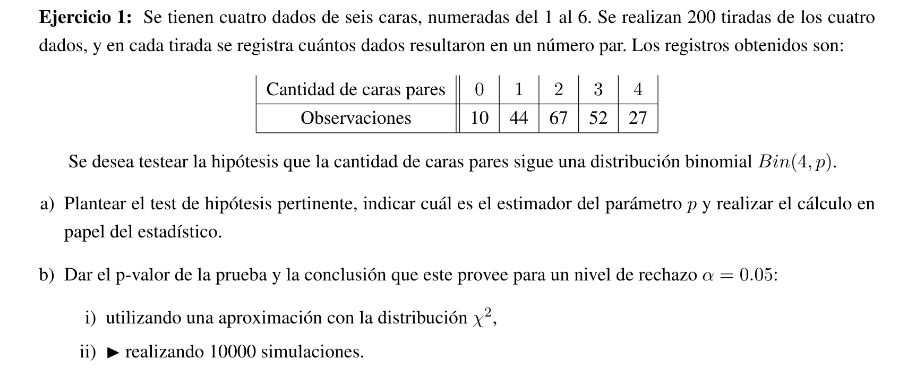

Mi estimador para p es:
$$
\hat{p} = 0.5525
$$

Ahora calculo:
$$
P(X = i) = \binom{4}{i} \hat{p}^i (1 - \hat{p})^{4 - i} \\
\text{para } i = 0, 1, 2, 3, 4
$$

In [9]:
p_hat = 0.5525
p_0 = sp.stats.binom.pmf(0, 4, p_hat)
p_1 = sp.stats.binom.pmf(1, 4, p_hat)
p_2 = sp.stats.binom.pmf(2, 4, p_hat)
p_3 = sp.stats.binom.pmf(3, 4, p_hat)
p_4 = sp.stats.binom.pmf(4, 4, p_hat)

pi = [p_0, p_1, p_2, p_3, p_4]
Ni = [10,44,67,52,27]
n = sum(Ni)

In [12]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t


def calcular_pvalor_param(t, k, m):
    return 1 - sp.stats.chi2.cdf(t, k-1-m)

In [14]:
t = estadistico(n, pi, Ni)
print(t)

6.441878945232579


In [21]:
calcular_pvalor_param(t, 5, 1)

0.0919830530914566

Como el p-valor es > 0.05, no rechazo la hipótesis nula.

Recalculo el p-valor usando simulaciones

In [22]:
def gen_muestra_bin(N, n, p):
    return [sp.stats.binom.rvs(n, p) for i in range(N)]

In [33]:
"""  
Simula el p-valor de un contraste de bondad de ajuste para la distribución binomial.

Parametros:
nsims -- número de simulaciones
n -- tamaño de la muestra
pi -- vector de probabilidades
Ni -- vector de frecuencias
"""
def simular_p_valor(nsims, n, pi, Ni, p_hat):
    t = estadistico(n, pi, Ni)
    print(n)
    print(t)
    hits = 0
    pi_sim = [0,0,0,0,0]
    Ni_sim = [0,0,0,0,0]
    for i in range(nsims):
        muestra = gen_muestra_bin(n, 4, p_hat)
        # estimo el parametro p a partir de esta nueva muestra, E[x] = n.p -> p = E[x]/n , n = 4
        p_hat_sim = np.mean(muestra)/4
        #print(p_hat_sim)
        pi_sim[0] = sp.stats.binom.pmf(0, 4, p_hat_sim)
        pi_sim[1] = sp.stats.binom.pmf(1, 4, p_hat_sim)
        pi_sim[2] = sp.stats.binom.pmf(2, 4, p_hat_sim)
        pi_sim[3] = sp.stats.binom.pmf(3, 4, p_hat_sim)
        pi_sim[4] = sp.stats.binom.pmf(4, 4, p_hat_sim)
        Ni_sim = np.unique(muestra, return_counts=True)[1]
        #print(pi_sim)
        #print(Ni_sim)
        t_sim = estadistico(n, pi_sim, Ni_sim)
        if t_sim >= t:
            hits += 1

    return hits/nsims

In [35]:
simular_p_valor(10000, n, pi, Ni, p_hat)

200
6.441878945232579


0.0927